# Transformation of columns for model

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
final_merge = pd.read_csv('../data/raw/final_merge.csv')

In [13]:
final_merge

,DNI,NIA,curs_preinscripcio,convocatoria,curs_matricula,sexe,data_naixement,nacionalitat,pais,CP,...,any_academic,assignatura,codi_assignatura,grup,tipus,semestre,exhaurides,superada,nota_numerica,nota_alfa
0,2536808O,1389371,2014,J,2014,H,1996-02-08,ESP,ESP,8022,...,2014,Emp,200265,101,B,1,2,S,4.0,SS
1,2536808O,1389371,2014,J,2014,H,1996-02-08,ESP,ESP,8022,...,2014,Fis,200266,101,B,1,2,S,3.0,SS
2,2536808O,1389371,2014,J,2014,H,1996-02-08,ESP,ESP,8022,...,2014,Inf,200267,101,B,1,2,S,3.4,SS
3,2536808O,1389371,2014,J,2014,H,1996-02-08,ESP,ESP,8022,...,2014,Mates,200268,101,B,1,2,S,1.5,SS
4,2536808O,1389371,2014,J,2014,H,1996-02-08,ESP,ESP,8022,...,2014,Antr,200269,101,O,1,1,S,5.0,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11421,3825529I,1687120,2022,F,2022,H,2003-04-30,ESP,ESP,25199,...,2022,Calc,104904,501,B,2,1,S,7.0,NT
11422,3825529I,1687120,2022,F,2022,H,2003-04-30,ESP,ESP,25199,...,2022,EGraf,104906,501,B,2,1,S,7.9,NT
11423,3825529I,1687120,2022,F,2022,H,2003-04-30,ESP,ESP,25199,...,2022,FisEl,104908,501,B,2,1,S,7.8,NT
11424,3825529I,1687120,2022,F,2022,H,2003-04-30,ESP,ESP,25199,...,2022,Quim,104909,501,B,2,1,S,7.0,NT


In [37]:
condition = final_merge["assignatura"]=='Antr'
math = final_merge[condition]

In [38]:
math.columns

Index(['DNI', 'NIA', 'curs_preinscripcio', 'convocatoria', 'curs_matricula',
       'sexe', 'data_naixement', 'nacionalitat', 'pais', 'CP', 'poblacio',
       'comarca', 'provincia', 'via_acces', 'nota_acces', 'ordre_assignacio',
       'orientacio', 'aspectes_eleccio', 'any_qualificacio',
       'convocatoria_qualificacio', 'treball_remunerat', 'estudis_pare',
       'estudis_mare', 'ocupacio_pare', 'ocupacio_mare',
       'codi_centre_secundaria', 'any_acabament_secundaria',
       'tipus_centre_secundaria', 'tipus_lloc_secundaria',
       'codi_lloc_secundaria', 'estudis_universitaris',
       'any_acces_primera_vegada_universitat', 'titulacio_nivell_assolit',
       'modalitat_acces', 'codi_grau', 'pla', 'any_academic', 'assignatura',
       'codi_assignatura', 'grup', 'tipus', 'semestre', 'exhaurides',
       'superada', 'nota_numerica', 'nota_alfa'],
      dtype='object')

In [39]:
math = math[['nota_acces', 'ordre_assignacio',
       'orientacio', 'aspectes_eleccio','treball_remunerat', 'estudis_pare',
       'estudis_mare', 'ocupacio_pare', 'ocupacio_mare','nota_numerica']]

In [40]:
correlation = final_merge.groupby('DNI').agg('nota_numerica')
correlation

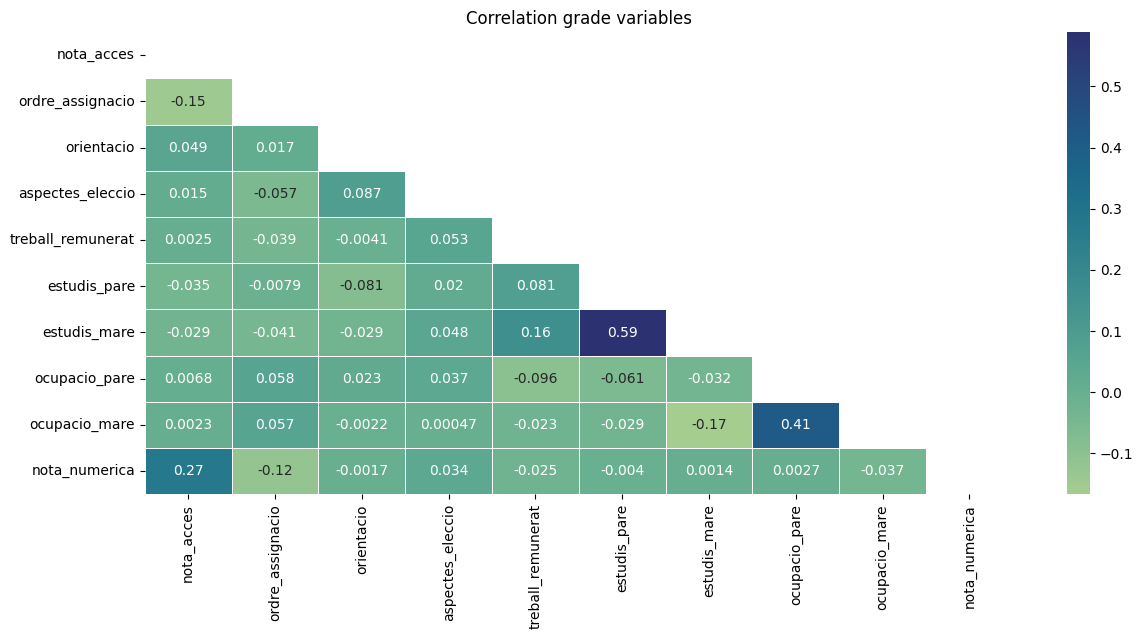

In [41]:
def heatmap_notes ():
    plt.figure(figsize=(14, 6))
    mask = np.triu(np.ones_like(math.corr()), k=0)
    sns.heatmap(math.corr(), annot=True, cmap='crest', linewidths=0.5, mask=mask)
    plt.title("Correlation grade variables")
    plt.show()  # Add this line to actually display the heatmap

# Call the function
heatmap_notes()